## Heros of Pymoli
#### Observed Trend 1
#### Men are 4 times more likely to be playing and purchasing Video games ( Men - 81% Women - 17%)
#### Observed Trend 2
#### As you age you trend to spend more on video games
#### Observed Trend 3
#### Top 5 most popular games are also Highest Grossing games.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_json("purchase_data.json")
df.columns = [ 'Age','Gender','ItemID','ItemName','Price','SN']
df.to_csv("output/purchase.csv")
#df.to_csv('out.csv')
df.head(5)


,Age,Gender,ItemID,ItemName,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


#### Player Count

In [28]:
#Total Number of Players
df2 = df.loc[:,['Gender', 'Age', 'SN']]
df2.drop_duplicates()
df2.head(5)

NumPlayers=df2.count()[0]
NumPlayers=len(df.groupby(['SN'])['SN'].count())

#print(str(NumPlayers))

display = pd.DataFrame({"Total Players" : [NumPlayers] })
display

573


,Total Players
0,573


### Number of Unique Items

In [29]:
# Number of Unique Items
len(df.groupby(['ItemName'])['Price'].count())
# Average Purchase Price
display = pd.DataFrame({"Unique Items" : [len(df.groupby(['ItemName'])['Price'].count())] })
display



,Unique Items
0,179


#### Average Purchase Price

In [32]:
# Average Purchase Price
NumPlayers=df['Age'].count()
df['Price'].sum()/NumPlayers

df3 = df.loc[:,['ItemID', 'ItemName', 'Price']]
df3.drop_duplicates()
average_price = df3['Price'].mean()

display = pd.DataFrame({"Average Price" : [round(average_price,2)] })
display

,Average Price
0,2.93


#### Total Number of Purchases

In [33]:
# Total Number of Purchases
NumPlayers=df['ItemID'].count()
print(str(NumPlayers))

display = pd.DataFrame({"Total Number of Purchase" : [round(NumPlayers,2)] })
display

780


,Total Number of Purchase
0,780


#### Total Revenue

In [34]:
# Total Revenue
df['Price'].sum()
display = pd.DataFrame({"Total Number of Purchase" : [round(df['Price'].sum(),2)] })
display

,Total Number of Purchase
0,2286.33


### Gender Demographics
#### Percentage and Count of Male Players

In [36]:

# Percentage and Count of Male Players
#df.loc[df.country == 'US']['id'].count()
#df1['average_backer_us'] = df.loc[df.country == 'US']['id'].count()/df['backers_count'].
male_per=100*df.loc[df.Gender == 'Male']['SN'].count()/NumPlayers
#print ( "Per:" +str(round(male_per,2)) +" Count:"+str(df.loc[df.Gender == 'Male']['SN'].count()) )

display = pd.DataFrame({"Percentage Male" : [round(male_per)] })
display


,Percentage Male
0,81.0


#### Percentage and Count of Female Players

In [37]:
# Percentage and Count of Female Players
female_per=100*df.loc[df.Gender == 'Female']['SN'].count()/NumPlayers
print ( "Per:"+ str(round(female_per,2)) + "Count:"+str(df.loc[df.Gender == 'Female']['SN'].count()) )


display = pd.DataFrame({"Percentage Female" : [round(female_per)] })
display

Per:17.44Count:136


,Percentage Female
0,17.0


#### Percentage and Count of Other / Non-Disclosed

In [40]:
# Percentage and Count of Other / Non-Disclosed
#surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]
nether_count = df.loc[(df.Gender != 'Female') & ( df.Gender != 'Male') ]['SN'].count()
nether_per=100*df.loc[(df.Gender != 'Female') & ( df.Gender != 'Male') ]['SN'].count()/NumPlayers
print ( "Per:"+ str(round(nether_per,2))+"Count: "+ str(nether_count) )


display = pd.DataFrame({"Percentage Other" : [round(nether_per,2)], 
                        "Count" : [round(nether_count,2)] })
display

Per:1.41Count: 11


,Count,Percentage Other
0,11,1.41


### Purchasing Analysis

In [43]:
# The below each broken by gender
  # Purchase Count
pcou = df.loc[df.Gender == 'Male']['SN'].count()
  # Average Purchase Price
pavg =  df.loc[df.Gender == 'Male']['Price'].mean()
  # Total Purchase Value
pval = df.loc[df.Gender == 'Male']['Price'].sum()
  # Normalized Totals
df_male = df.loc[(df.Gender == 'Male')]
unique_count = len(df_male.groupby(['SN'])['SN'].count())
norm = round(pval/unique_count,2)    
print("Purchase stats by Male---")
print ("Purchase Count:"+str(pcou)+" Avg Price:"+str(round(pavg,2))+" Sum Val:"+str(round(pval,2))+ "Norm Tot:"+str(norm))


display = pd.DataFrame({"Purchase Count:" : [round(pcou,2)], 
                        "Avg Price" : [round(pavg,2)],
                        "Sum Value" : [round(pval,2)],
                        "Norm Tot" :  [round(norm,2)]
                         })
display


Purchase stats by Male---
Purchase Count:633 Avg Price:2.95 Sum Val:1867.68Norm Tot:4.02


,Avg Price,Norm Tot,Purchase Count:,Sum Value
0,2.95,4.02,633,1867.68


In [44]:
# The below each broken by gender
  # Purchase Count
pcou = df.loc[df.Gender == 'Female']['SN'].count()
  # Average Purchase Price
pavg =  df.loc[df.Gender == 'Female']['Price'].mean()
  # Total Purchase Value
pval = df.loc[df.Gender == 'Female']['Price'].sum()
df_female = df.loc[(df.Gender == 'Female')]
unique_count = len(df_female.groupby(['SN'])['SN'].count())
norm = round(pval/unique_count,2)    
  # Normalized Totals
print("Purchase stats by Female---")
print ("Purchase Count:"+str(pcou)+" Avg Price:"+str(round(pavg,2))+" Sum Val:"+str(round(pval,2))+ "Norm Tot:"+str(norm))
 

    
display = pd.DataFrame({"Purchase Count:" : [round(pcou,2)], 
                        "Avg Price" : [round(pavg,2)],
                        "Sum Value" : [round(pval,2)],
                        "Norm Tot" :  [round(norm,2)]
                         })
display
    

Purchase stats by Female---
Purchase Count:136 Avg Price:2.82 Sum Val:382.91Norm Tot:3.83


,Avg Price,Norm Tot,Purchase Count:,Sum Value
0,2.82,3.83,136,382.91


#### **Age Demographics**

In [19]:
#df.loc[ df.SN == 'Undirrala66']  

In [47]:
#**Age Demographics**

#* The below each broken into bins of 4 years (i.e. &lt;10, 10-14, 15-19, etc.) 
#  * Purchase Count
df_10 = df.loc[df.Age < 10]

avg_10 = df_10['Price'].sum()/df_10['Price'].count()
tot_10 = df_10['Price'].sum() 
unique_count_10 = len(df_10.groupby(['SN'])['SN'].count())
norm_10 = round(tot_10/unique_count_10,2)    

df_14 = df.loc[ ( df.Age >= 10 ) & (df.Age <= 14) ]

avg_14 = df_14['Price'].sum()/df_14['Price'].count()
tot_14 = df_14['Price'].sum() 
unique_count_14 = len(df_14.groupby(['SN'])['SN'].count())
norm_14 = round(tot_14/unique_count_14,2)    

df_19 = df.loc[ ( df.Age <= 15 ) & (df.Age <= 19) ]

avg_19 = df_19['Price'].sum()/df_19['Price'].count()
tot_19 = df_19['Price'].sum() 
unique_count_19 = len(df_19.groupby(['SN'])['SN'].count())
norm_19 = round(tot_19/unique_count_19,2)  

#df_19
#  * Average Purchase Price
#  * Total Purchase Value
#  * Normalized Totals
print("Average 10 under:"+str(round(avg_10,2))+" Sum: "+str(round(tot_10,2))+"Norm:"+str(norm_10) )
print("Average 14 under:"+str(round(avg_14,2))+" Sum: "+str(round(tot_14,2))+"Norm:"+str(norm_14) )
print("Average 19 under:"+str(round(avg_19,2))+" Sum: "+str(round(tot_19,2))+"Norm:"+str(norm_19) )


display = pd.DataFrame({"Age Category:" : ['10 Under','!4 -10','19-14'], 
                        "Average:" : [round(avg_10,2), round(avg_14,2), round(avg_19,2) ],
                        "Sum" : [round(tot_10,2), round(tot_14,2),round(tot_19,2) ],
                        "Norm Tot" :  [round(norm_10,2),round(norm_14,2),round(norm_19,2) ]
                         })
display

 

Average 10 under:2.98 Sum: 83.46Norm:4.39
Average 14 under:2.77 Sum: 96.95Norm:4.22
Average 19 under:2.92 Sum: 320.77Norm:4.22


,Age Category:,Average:,Norm Tot,Sum
0,10 Under,2.98,4.39,83.46
1,!4 -10,2.77,4.22,96.95
2,19-14,2.92,4.22,320.77


#### Top Spenders

In [21]:
# Identify the the top 5 spenders in the game by total purchase value, then list (in a table):
  # SN  df.groupby('A').sum().sort('B')
  

df1 = df.groupby('SN', sort=False).sum()  
df1['Counts'] = df.groupby(['SN'])['Price'].count()
df1['Average'] = df.groupby(['SN'])['Price'].mean()
df1['Sum'] = df.groupby(['SN'])['Price'].sum()
df1.sort_values(['Price'], ascending=False, inplace=True)
df1.head(5)



,Age,ItemID,Price,Counts,Average,Sum
SN,,,,,,
Undirrala66,145,472,17.06,5,3.412000,17.06
Saedue76,100,233,13.56,4,3.390000,13.56
Mindimnya67,156,609,12.74,4,3.185000,12.74
Haellysu29,63,353,12.73,3,4.243333,12.73
Eoda93,66,284,11.58,3,3.860000,11.58


#### Most Popular Items

In [22]:
# Identify the 5 most popular items by purchase count, then list (in a table):
#  * Item ID
#  * Item Name
#  * Purchase Count
#  * Item Price
#  * Total Purchase Value
df2 = df.groupby('ItemName', sort=False).count() 
df2['ItemCount'] = df.groupby(['ItemName'])['Price'].count()
df2.sort_values(['ItemCount'], ascending=False, inplace=True)
df2.head(5)

,Age,Gender,ItemID,Price,SN,ItemCount
ItemName,,,,,,
Final Critic,14,14,14,14,14,14
Arcane Gem,11,11,11,11,11,11
"Betrayal, Whisper of Grieving Widows",11,11,11,11,11,11
Stormcaller,10,10,10,10,10,10
Woeful Adamantite Claymore,9,9,9,9,9,9


In [48]:
#df.loc[df.ItemName=='Arcane Gem']

#### Most Profitable Items

In [49]:
#**Most Profitable Items**
df2 = df.groupby('ItemName', sort=False).count() 
df2.sort_values(['Price'], ascending=False, inplace=True)
df2['ItemValue'] = df.groupby(['ItemName'])['Price'].sum()
df2.sort_values(['ItemValue'], ascending=False, inplace=True)
df2.head(5)

# Identify the 5 most profitable items by total purchase value, then list (in a table):
#  * Item ID
#  * Item Name
#  * Purchase Count
#  * Item Price
#  * Total Purchase Value

,Age,Gender,ItemID,Price,SN,ItemValue
ItemName,,,,,,
Final Critic,14,14,14,14,14,38.60
Retribution Axe,9,9,9,9,9,37.26
Stormcaller,10,10,10,10,10,34.65
Spectral Diamond Doomblade,7,7,7,7,7,29.75
Orenmir,6,6,6,6,6,29.70


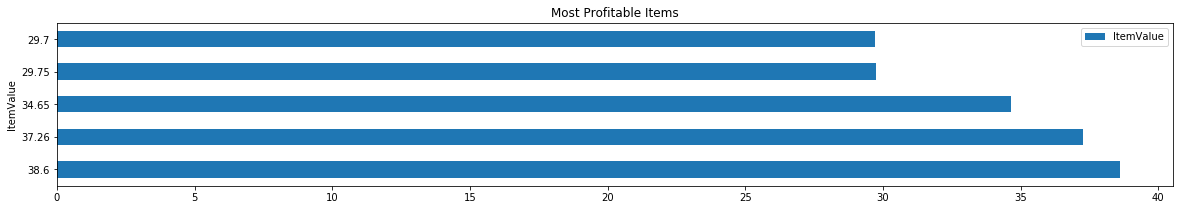

In [50]:
df3 = df2.loc[:,['ItemValue']]
df4 = df3[0:5]
df4.plot(x=df4["ItemValue"], kind="barh", figsize=(20, 3), title="Most Profitable Items")
plt.show()

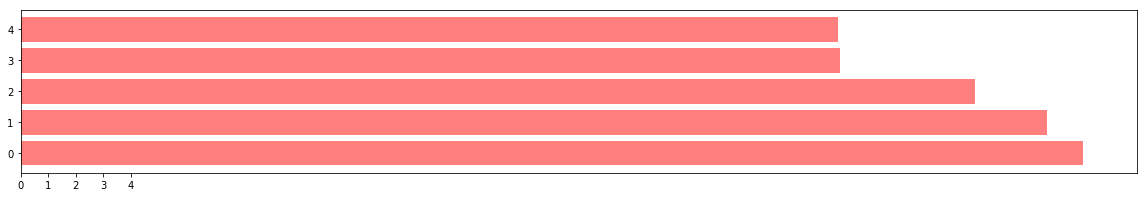

In [51]:
plt.figure(figsize = (20,3))

x_axis  = np.arange(len(df4['ItemValue'].tolist()))
y_axis  = df4['ItemValue'].tolist()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [ ])

plt.barh(x_axis, y_axis, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis  )

plt.show()